In [1]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import GetOldTweets3 as got
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap
import plotly_express as px

In [3]:
# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [4]:
df=pd.read_csv('../Datasets/final.csv')
df

,Unnamed: 0,Tweets,Date,country,compound,Sentiment,month,Country/Region
0,0,These chinese people on campus are so consider...,2020-01-28,afghanistan,0.5777,positive,1,Afghanistan
1,1,So the first month of the new decade went some...,2020-01-30,albania,0.2732,positive,1,Albania
2,2,Coronavirus sounds nice and all but I'm actual...,2020-01-30,albania,0.2263,positive,1,Albania
3,3,Also a good compendium of information on #nCoV...,2020-01-22,albania,0.4404,positive,1,Albania
4,4,OMG I WAS JUST\r\n\r\nearlier today I was expl...,2020-01-21,albania,0.9042,positive,1,Albania
5,5,PATRIOTS PLEASE WATCH. PUT POLITICS ON HOLD. ...,2020-01-27,albania,0.5160,positive,1,Albania
6,6,This coronavirus is fast resembling a John Rin...,2020-01-29,albania,0.3182,positive,1,Albania
7,7,Good news from WHO Regarding the Coronavirus: ...,2020-01-12,antigua and barbuda,0.4404,positive,1,Antigua and Barbuda
8,8,Forbes Coronavirus Coverage best summary I’ve ...,2020-01-30,argentina,0.6369,positive,1,Argentina
9,9,Fun fact: coronavirus is named for the latin w...,2020-01-08,argentina,0.7003,positive,1,Argentina


In [5]:
df=df.drop(['Unnamed: 0'],axis=1)
df=df.drop_duplicates()
df=df.reset_index()

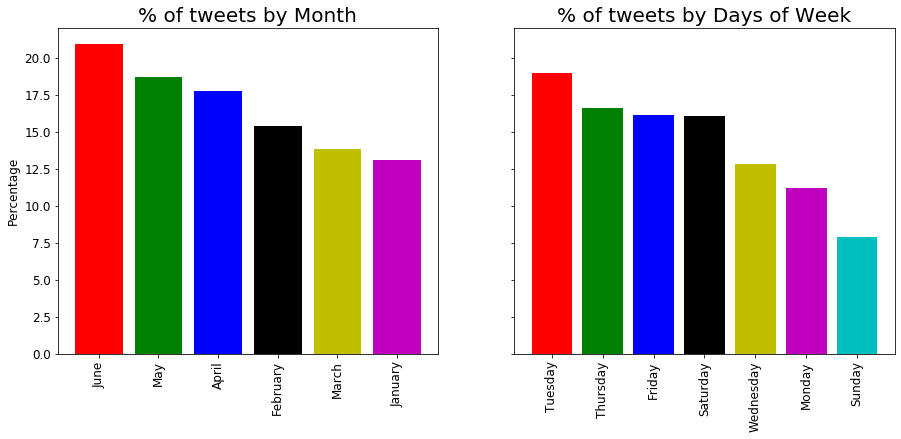

In [6]:
df["timestamp"] = pd.to_datetime(df["Date"])
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df["monthName"] = df.timestamp.dt.month_name()
data = df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month')

df["dayName"] = df.timestamp.dt.day_name()
data = df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()

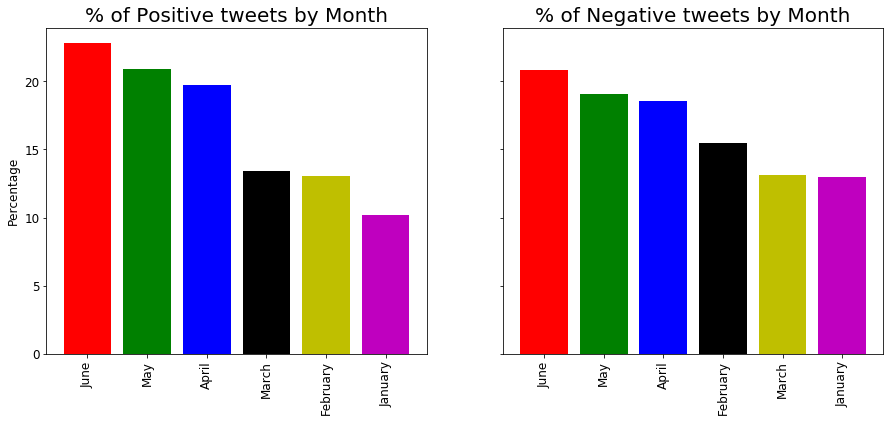

In [9]:
df_pos=df[df.Sentiment=='positive']
data = df_pos["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive tweets by Month')

df_neg=df[df.Sentiment=='negative']
data = df_neg["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative tweets by Month')

plt.show()

In [10]:
by_day_sentiment = df.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')

In [11]:
by_day_sentiment=by_day_sentiment.fillna(0)

In [12]:
by_day_sentiment['total']=by_day_sentiment['positive']+by_day_sentiment['negative']+by_day_sentiment['neutral']
by_day_sentiment

Sentiment,negative,neutral,positive,total
timestamp,,,,
2020-01-01,0.0,1.0,3.0,4.0
2020-01-02,0.0,2.0,0.0,2.0
2020-01-03,3.0,2.0,6.0,11.0
2020-01-04,2.0,2.0,3.0,7.0
2020-01-05,3.0,1.0,2.0,6.0
2020-01-06,2.0,8.0,3.0,13.0
2020-01-07,2.0,5.0,3.0,10.0
2020-01-08,9.0,30.0,28.0,67.0
2020-01-09,128.0,140.0,77.0,345.0


In [13]:
by_day_sentiment['positive']=by_day_sentiment['positive']/by_day_sentiment['total']
by_day_sentiment['negative']=by_day_sentiment['negative']/by_day_sentiment['total']
by_day_sentiment['neutral']=by_day_sentiment['neutral']/by_day_sentiment['total']

In [14]:
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)

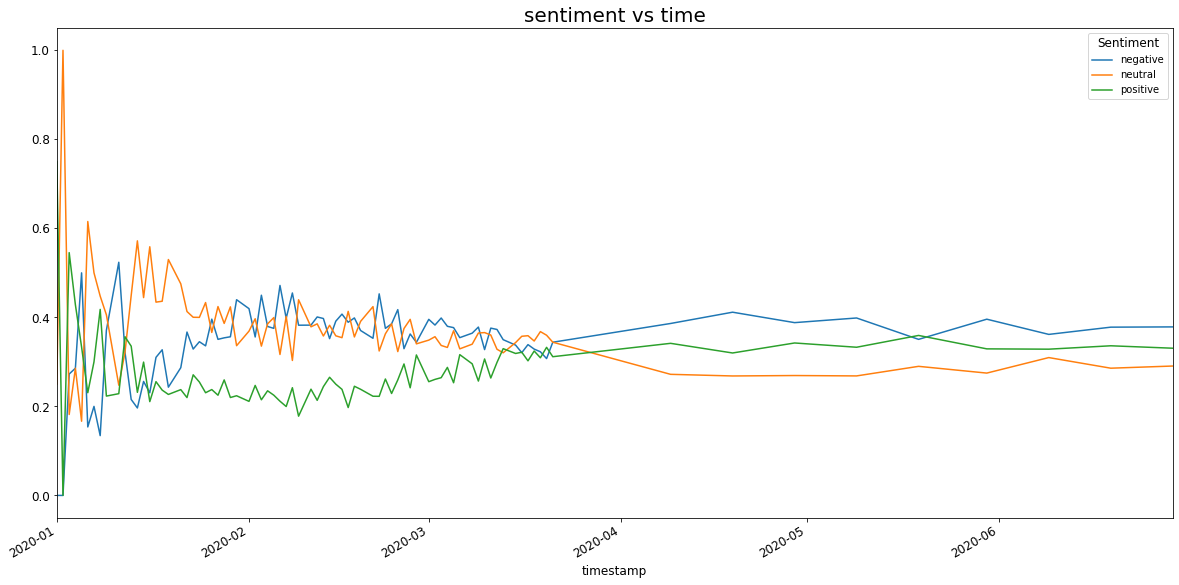

In [15]:
by_day_sentiment.plot(title='sentiment vs time',figsize=(20, 10))

In [16]:
#WORK FROM HOME
df_wfh=pd.read_csv('../Datasets/WFH_final.csv')
df_wfh=df_wfh.drop(['Unnamed: 0'],axis=1)
df_wfh=df_wfh.drop_duplicates()
df_wfh=df_wfh.reset_index()

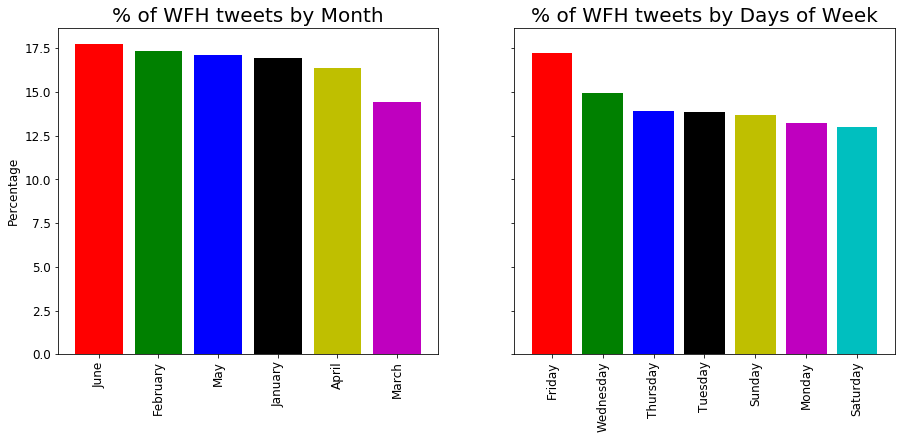

In [17]:
df_wfh["timestamp"] = pd.to_datetime(df_wfh["Date"])
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df_wfh["monthName"] = df_wfh.timestamp.dt.month_name()
data = df_wfh["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of WFH tweets by Month')

df_wfh["dayName"] = df_wfh.timestamp.dt.day_name()
data = df_wfh["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of WFH tweets by Days of Week')

plt.show()

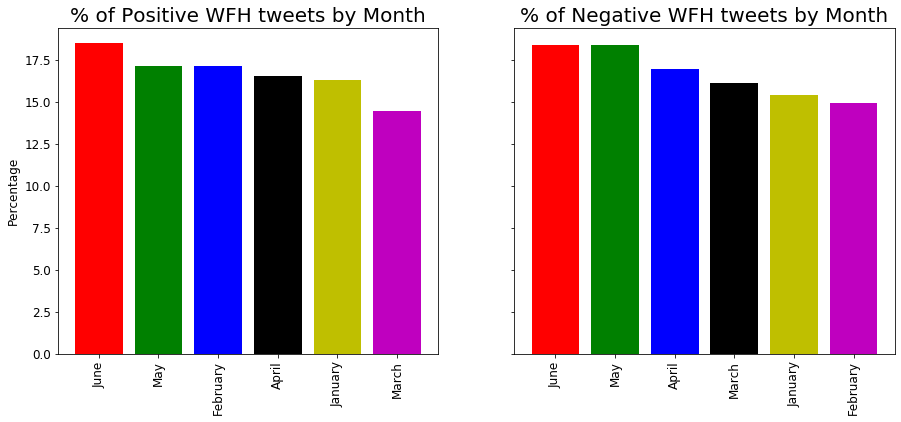

In [22]:
df_wfh_pos=df_wfh[df_wfh.Sentiment=='Positive']
data = df_wfh_pos["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive WFH tweets by Month')

df_wfh_neg=df_wfh[df_wfh.Sentiment=='Negative']
data = df_wfh_neg["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative WFH tweets by Month')

plt.show()

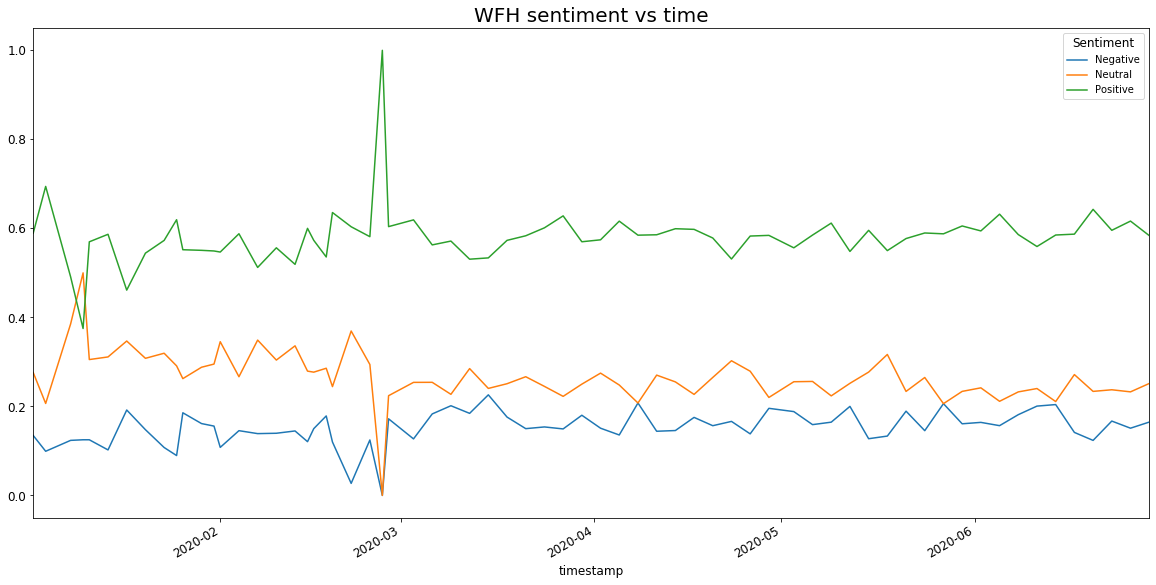

In [19]:
by_day_sentiment = df_wfh.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Negative']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Negative']=by_day_sentiment['Negative']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='WFH sentiment vs time',figsize=(20, 10))

In [20]:
#ONLINE LEARNING
df_ol=pd.read_csv('../Datasets/OL_final.csv')
df_ol=df_ol.drop(['Unnamed: 0'],axis=1)
df_ol=df_ol.drop_duplicates()
df_ol=df_ol.reset_index()

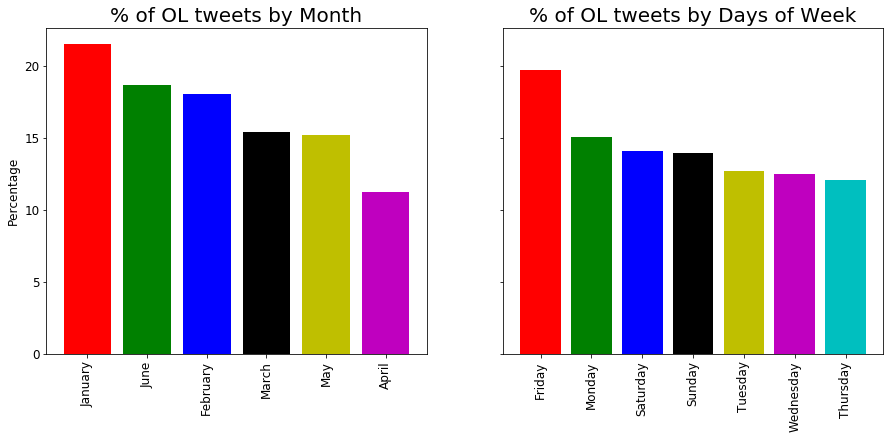

In [21]:
df_ol["timestamp"] = pd.to_datetime(df_ol["Date"])
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df_ol["monthName"] = df_ol.timestamp.dt.month_name()
data = df_ol["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of OL tweets by Month')

df_ol["dayName"] = df_ol.timestamp.dt.day_name()
data = df_ol["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of OL tweets by Days of Week')

plt.show()

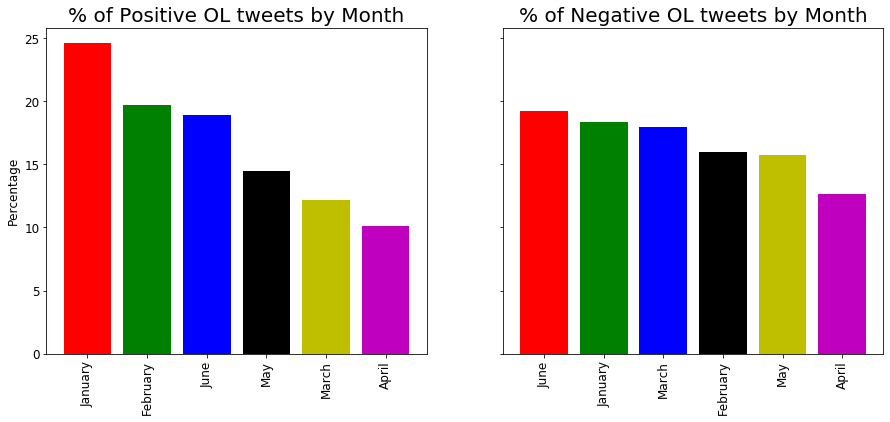

In [23]:
df_ol_pos=df_ol[df_ol.Sentiment=='Positive']
data = df_ol_pos["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive OL tweets by Month')

df_ol_neg=df_ol[df_ol.Sentiment=='Negative']
data = df_ol_neg["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative OL tweets by Month')

plt.show()

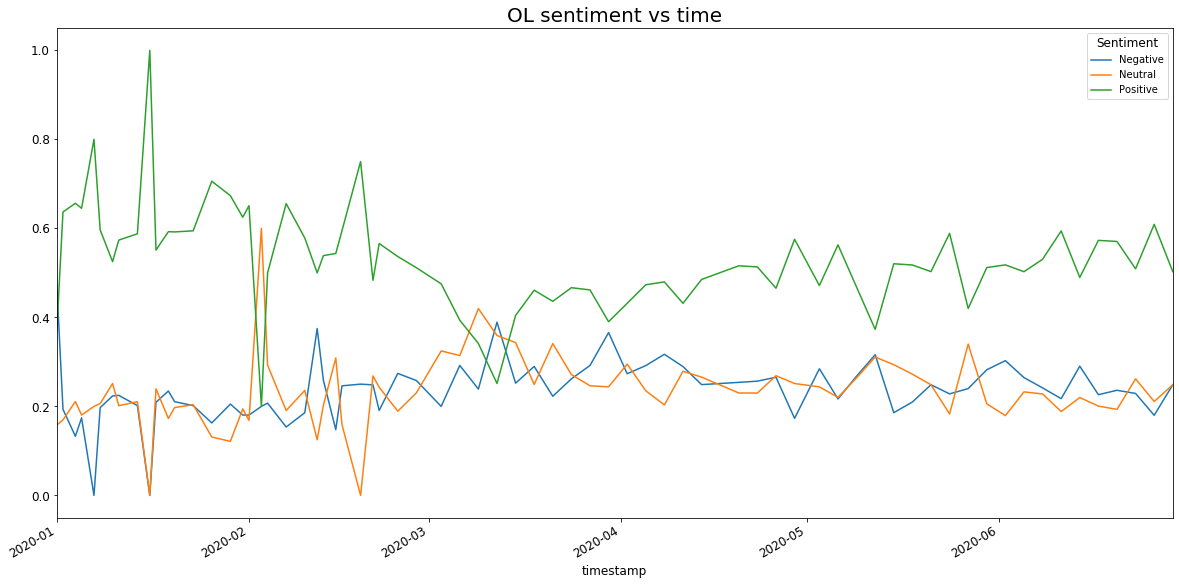

In [24]:
by_day_sentiment = df_ol.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Negative']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Negative']=by_day_sentiment['Negative']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='OL sentiment vs time',figsize=(20, 10))

In [25]:
#WORST HIT COUNTRIES- US
df_US=df[df.country=='us']
df_US_wfh=df_wfh[df_wfh.country=='us']
df_US_ol=df_ol[df_ol.country=='us']

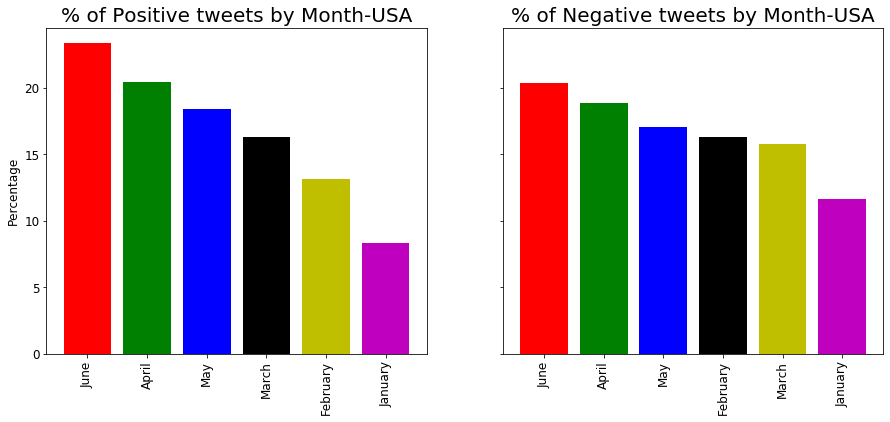

In [26]:
df_pos_us=df_US[df_US.Sentiment=='positive']
data = df_pos_us["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive tweets by Month-USA')

df_neg_us=df_US[df_US.Sentiment=='negative']
data = df_neg_us["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative tweets by Month-USA')

plt.show()

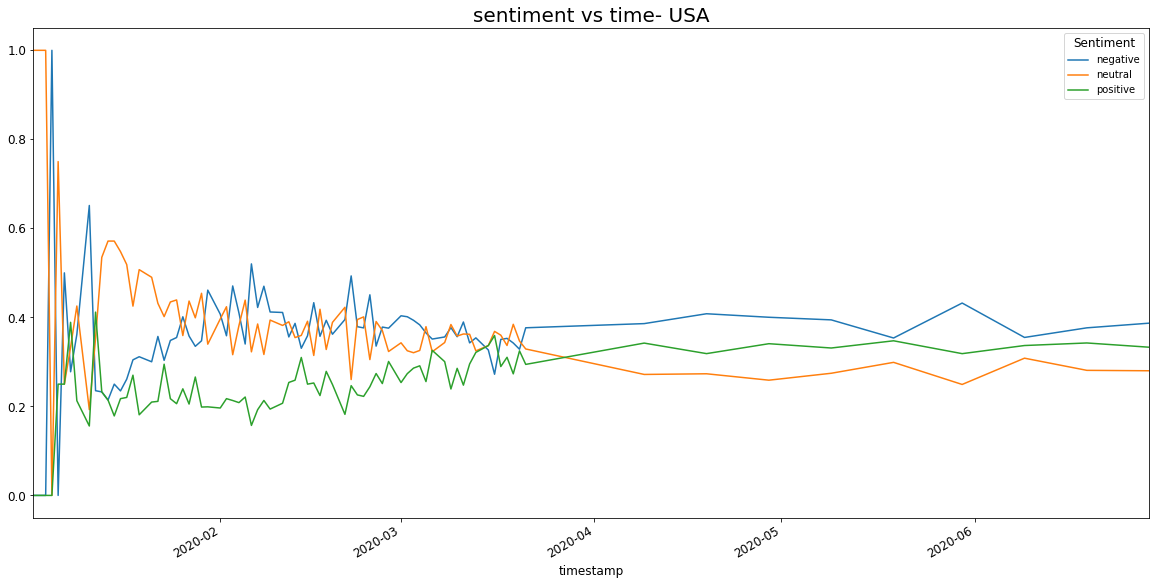

In [27]:
by_day_sentiment = df_US.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['positive']+by_day_sentiment['negative']+by_day_sentiment['neutral']
by_day_sentiment['positive']=by_day_sentiment['positive']/by_day_sentiment['total']
by_day_sentiment['negative']=by_day_sentiment['negative']/by_day_sentiment['total']
by_day_sentiment['neutral']=by_day_sentiment['neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='sentiment vs time- USA',figsize=(20, 10))

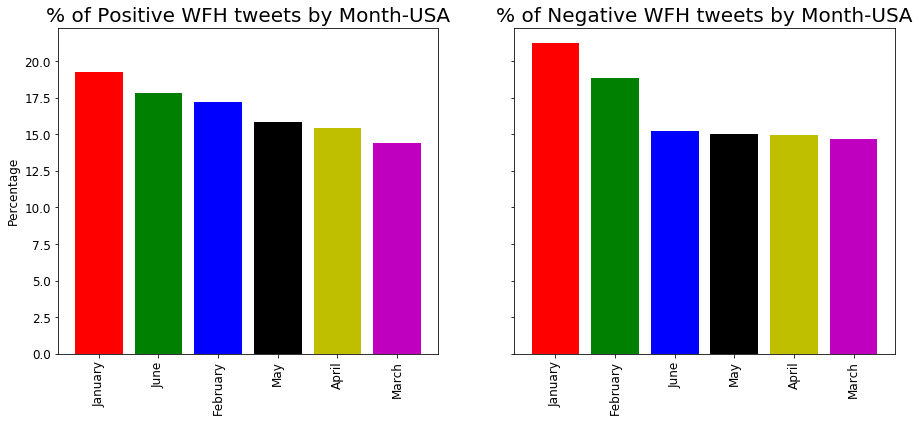

In [30]:
df_pos_us_wfh=df_US_wfh[df_US_wfh.Sentiment=='Positive']
data = df_pos_us_wfh["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive WFH tweets by Month-USA')

df_neg_us_wfh=df_US_wfh[df_US_wfh.Sentiment=='Negative']
data = df_neg_us_wfh["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative WFH tweets by Month-USA')

plt.show()

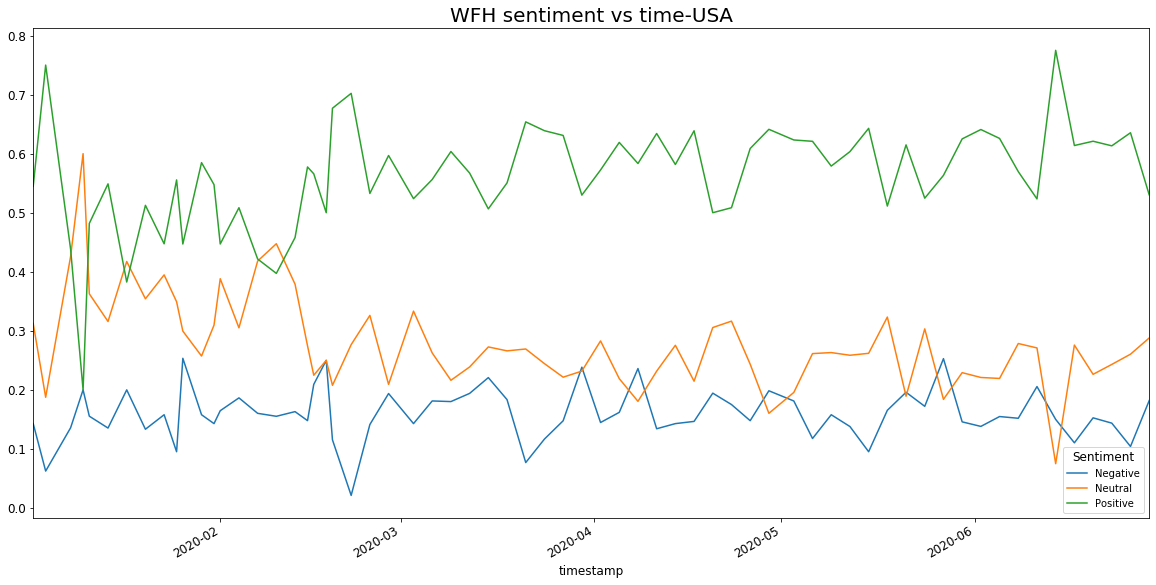

In [28]:
by_day_sentiment = df_US_wfh.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Negative']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Negative']=by_day_sentiment['Negative']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='WFH sentiment vs time-USA',figsize=(20, 10))

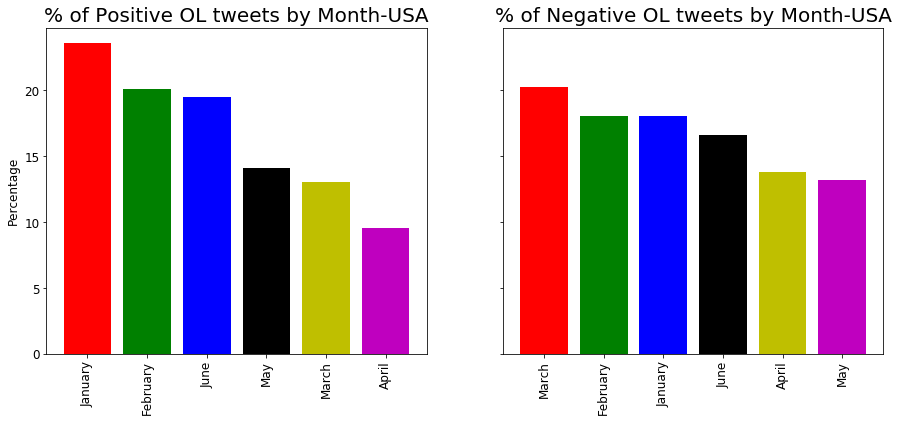

In [31]:
df_pos_us_ol=df_US_ol[df_US_ol.Sentiment=='Positive']
data = df_pos_us_ol["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive OL tweets by Month-USA')

df_neg_us_ol=df_US_ol[df_US_ol.Sentiment=='Negative']
data = df_neg_us_ol["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative OL tweets by Month-USA')

plt.show()

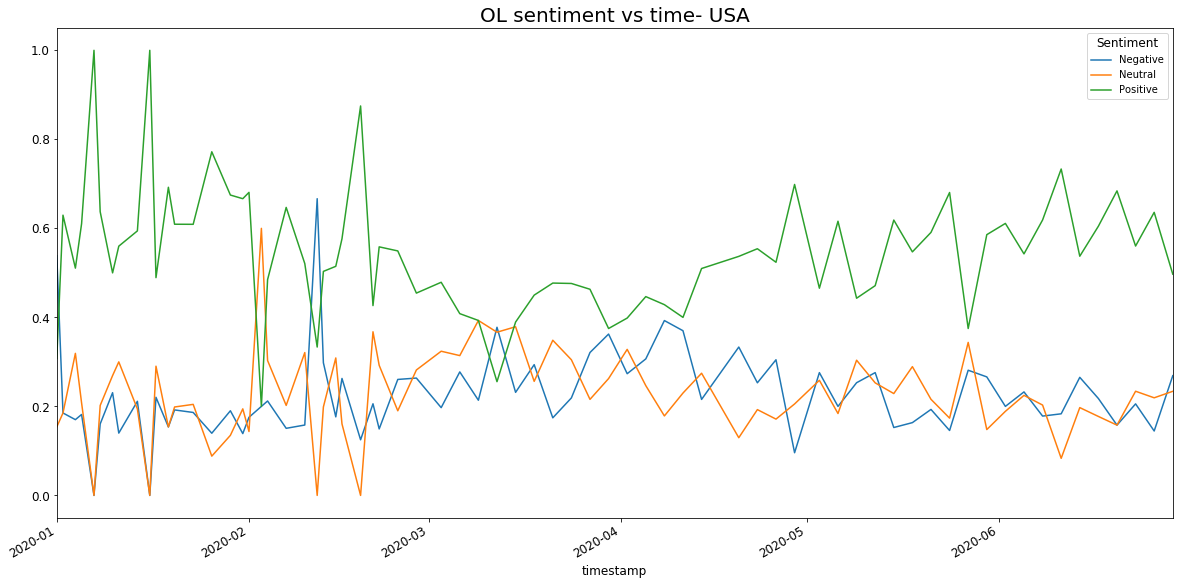

In [32]:
by_day_sentiment = df_US_ol.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Negative']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Negative']=by_day_sentiment['Negative']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='OL sentiment vs time- USA',figsize=(20, 10))

In [33]:
#WORST HIT COUNTRIES- INDIA
df_india=df[df.country=='india']
df_india_wfh=df_wfh[df_wfh.country=='india']
df_india_ol=df_ol[df_ol.country=='india']

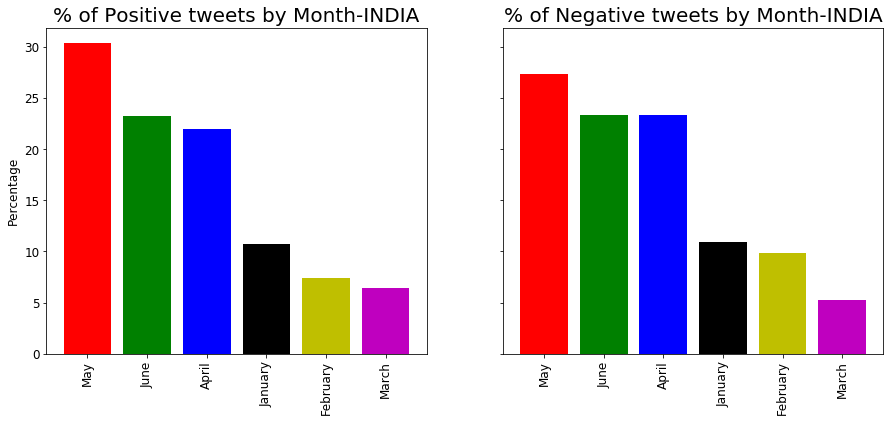

In [34]:
df_pos_india=df_india[df_india.Sentiment=='positive']
data = df_pos_india["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive tweets by Month-INDIA')

df_neg_india=df_india[df_india.Sentiment=='negative']
data = df_neg_india["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative tweets by Month-INDIA')

plt.show()

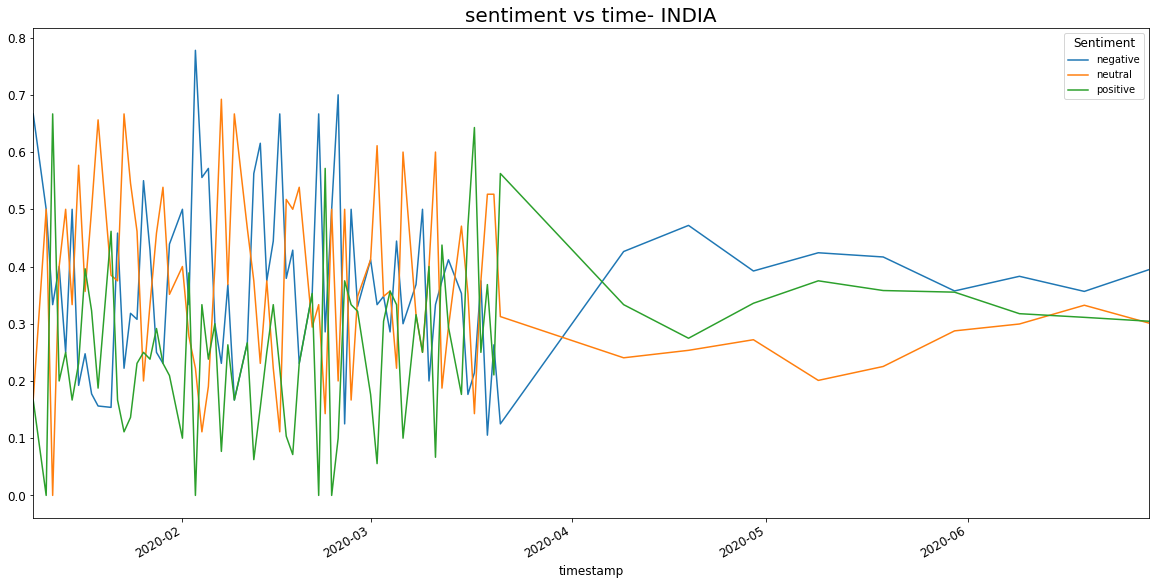

In [35]:
by_day_sentiment = df_india.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['positive']+by_day_sentiment['negative']+by_day_sentiment['neutral']
by_day_sentiment['positive']=by_day_sentiment['positive']/by_day_sentiment['total']
by_day_sentiment['negative']=by_day_sentiment['negative']/by_day_sentiment['total']
by_day_sentiment['neutral']=by_day_sentiment['neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='sentiment vs time- INDIA',figsize=(20, 10))

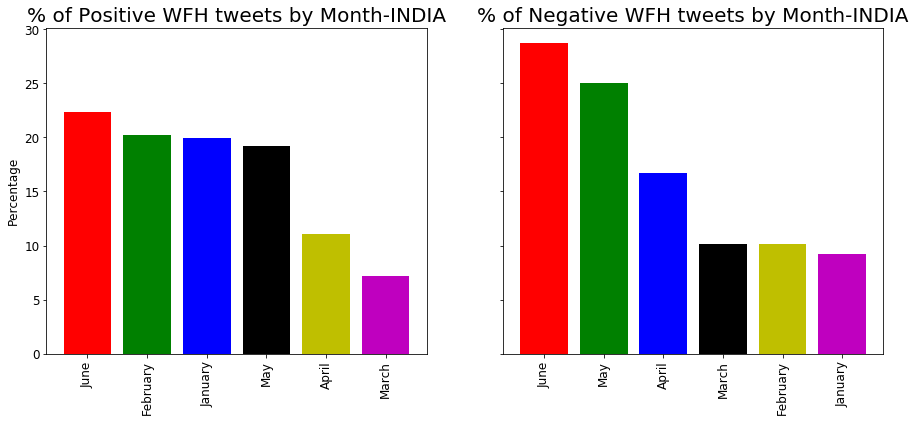

In [36]:
df_pos_india_wfh=df_india_wfh[df_india_wfh.Sentiment=='Positive']
data = df_pos_india_wfh["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive WFH tweets by Month-INDIA')

df_neg_india_wfh=df_india_wfh[df_india_wfh.Sentiment=='Negative']
data = df_neg_india_wfh["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative WFH tweets by Month-INDIA')

plt.show()

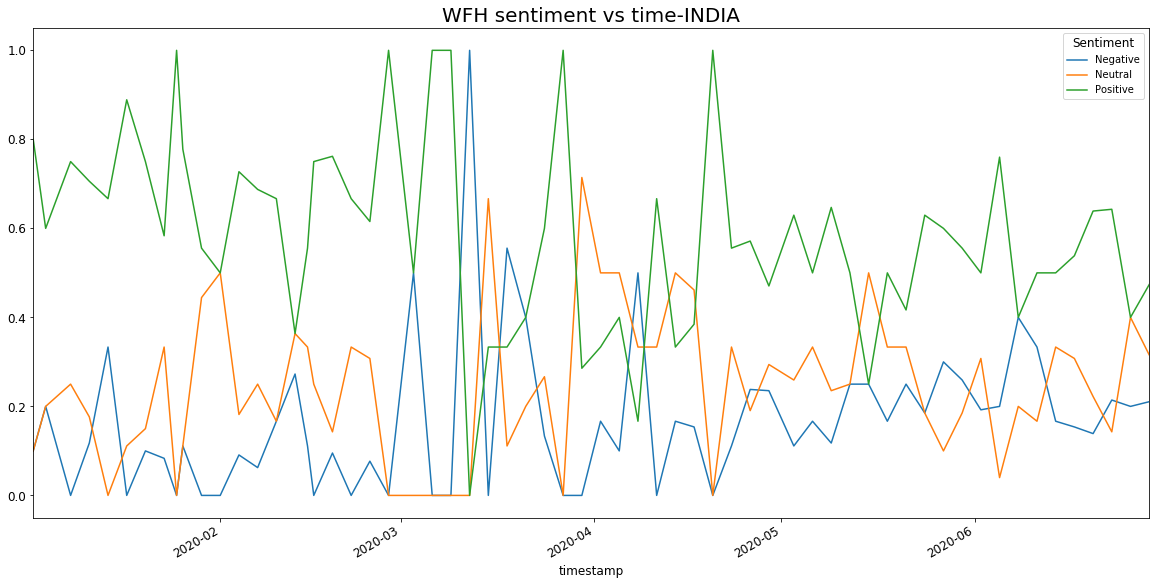

In [37]:
by_day_sentiment = df_india_wfh.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Negative']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Negative']=by_day_sentiment['Negative']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='WFH sentiment vs time-INDIA',figsize=(20, 10))

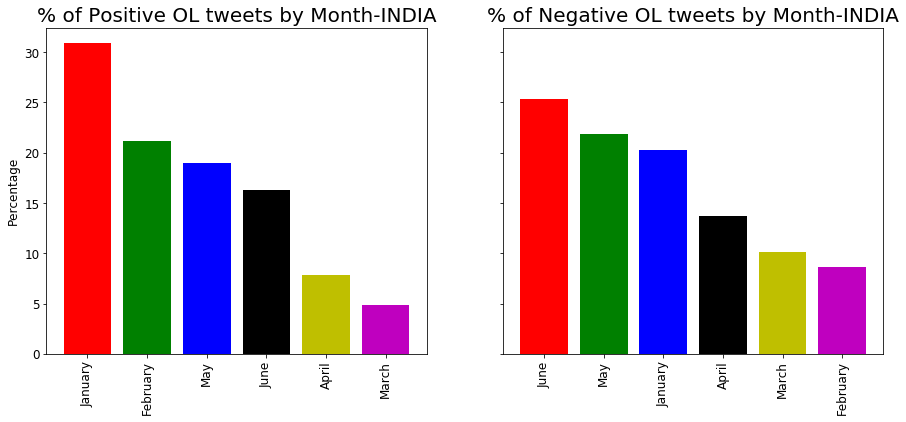

In [38]:
df_pos_india_ol=df_india_ol[df_india_ol.Sentiment=='Positive']
data = df_pos_india_ol["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive OL tweets by Month-INDIA')

df_neg_india_ol=df_india_ol[df_india_ol.Sentiment=='Negative']
data = df_neg_india_ol["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative OL tweets by Month-INDIA')

plt.show()

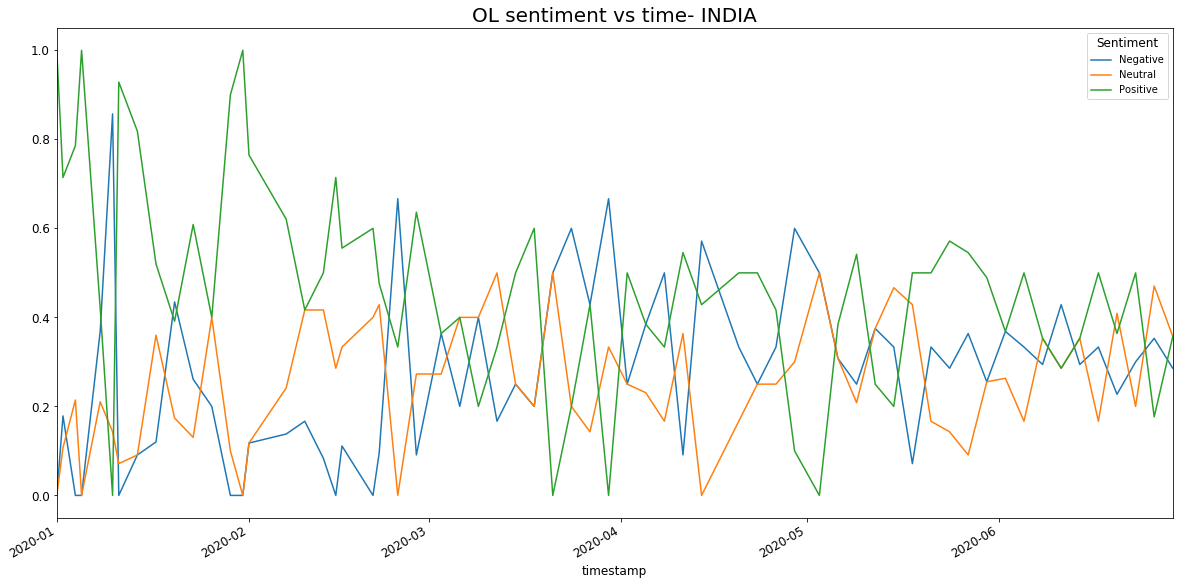

In [39]:
by_day_sentiment = df_india_ol.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Negative']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Negative']=by_day_sentiment['Negative']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='OL sentiment vs time- INDIA',figsize=(20, 10))

In [40]:
#WORST HIT COUNTRIES- BRAZIL
df_brazil=df[df.country=='brazil']
df_brazil_wfh=df_wfh[df_wfh.country=='brazil']
df_brazil_ol=df_ol[df_ol.country=='brazil']

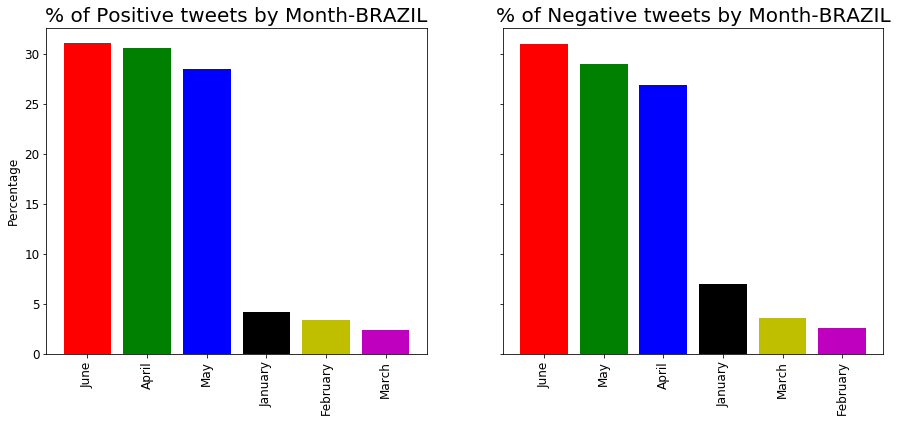

In [41]:
df_pos_brazil=df_brazil[df_brazil.Sentiment=='positive']
data = df_pos_brazil["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive tweets by Month-BRAZIL')

df_neg_brazil=df_brazil[df_brazil.Sentiment=='negative']
data = df_neg_brazil["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative tweets by Month-BRAZIL')

plt.show()

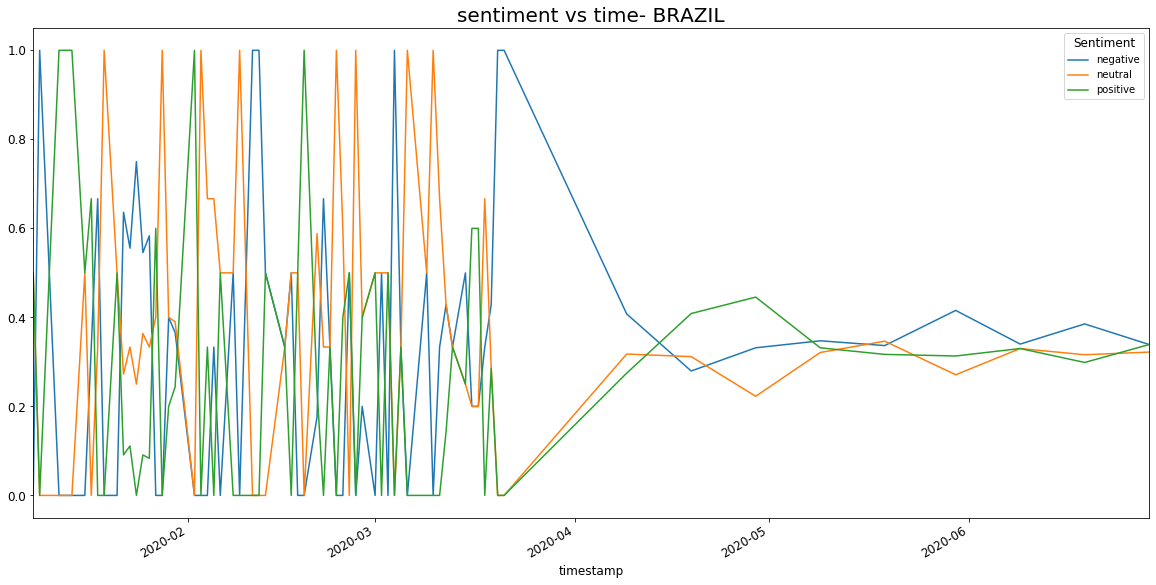

In [42]:
by_day_sentiment = df_brazil.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['positive']+by_day_sentiment['negative']+by_day_sentiment['neutral']
by_day_sentiment['positive']=by_day_sentiment['positive']/by_day_sentiment['total']
by_day_sentiment['negative']=by_day_sentiment['negative']/by_day_sentiment['total']
by_day_sentiment['neutral']=by_day_sentiment['neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='sentiment vs time- BRAZIL',figsize=(20, 10))

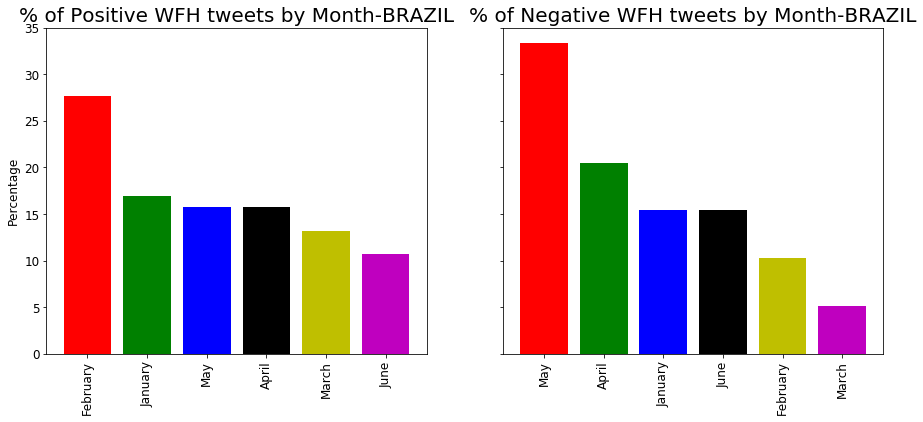

In [43]:
df_pos_brazil_wfh=df_brazil_wfh[df_brazil_wfh.Sentiment=='Positive']
data = df_pos_brazil_wfh["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive WFH tweets by Month-BRAZIL')

df_neg_brazil_wfh=df_brazil_wfh[df_brazil_wfh.Sentiment=='Negative']
data = df_neg_brazil_wfh["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative WFH tweets by Month-BRAZIL')

plt.show()

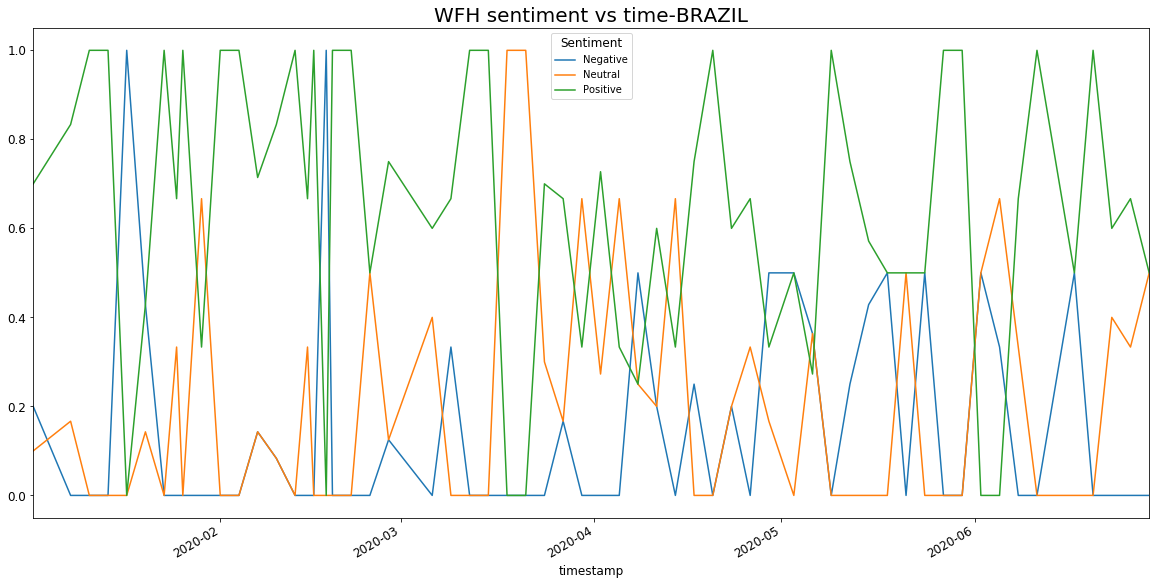

In [44]:
by_day_sentiment = df_brazil_wfh.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Negative']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Negative']=by_day_sentiment['Negative']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='WFH sentiment vs time-BRAZIL',figsize=(20, 10))

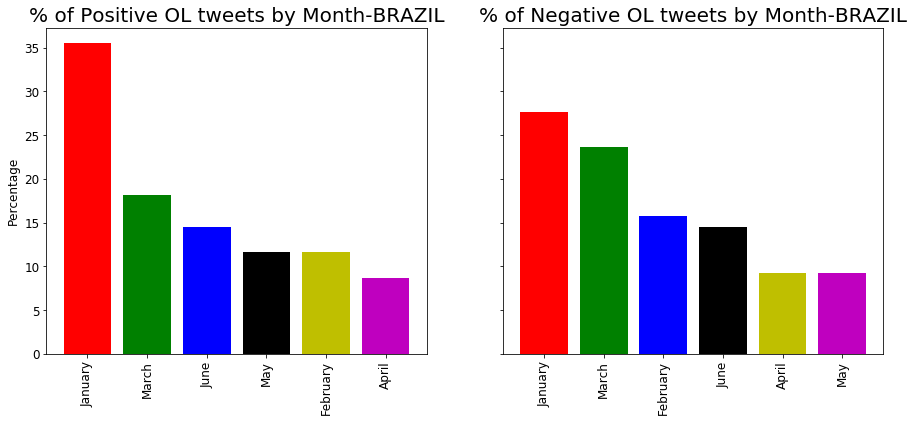

In [45]:
df_pos_brazil_ol=df_brazil_ol[df_brazil_ol.Sentiment=='Positive']
data = df_pos_brazil_ol["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive OL tweets by Month-BRAZIL')

df_neg_brazil_ol=df_brazil_ol[df_brazil_ol.Sentiment=='Negative']
data = df_neg_brazil_ol["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative OL tweets by Month-BRAZIL')

plt.show()

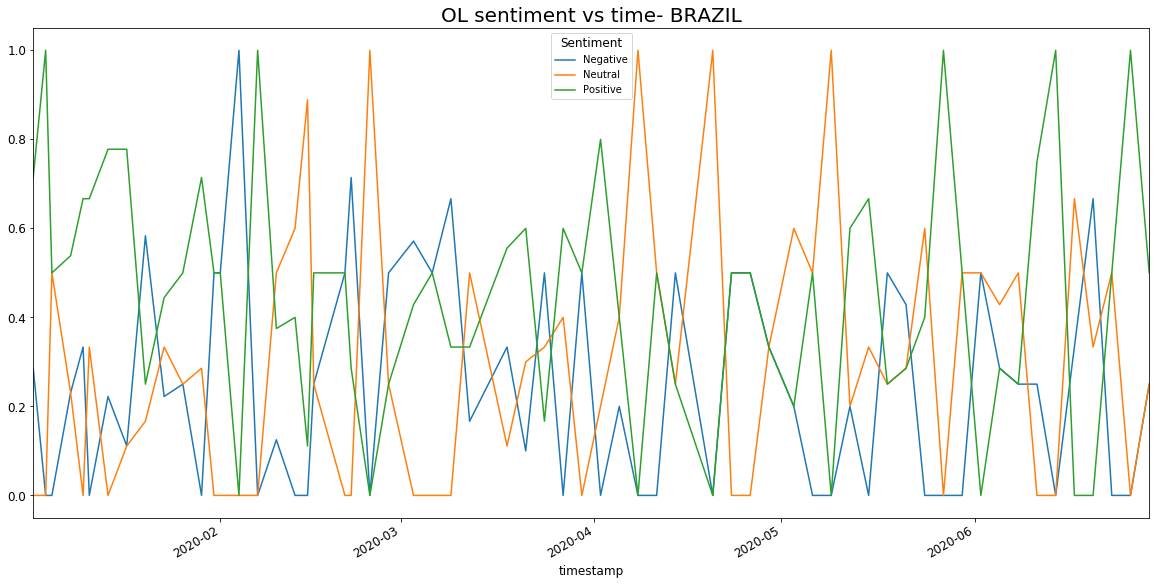

In [46]:
by_day_sentiment = df_brazil_ol.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Negative']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Negative']=by_day_sentiment['Negative']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='OL sentiment vs time- BRAZIL',figsize=(20, 10))

In [47]:
#LEAST HIT COUNTRIES-New Zealand
df_nz=df[df.country=='new zealand']
df_nz_wfh=df_wfh[df_wfh.country=='new zealand']
df_nz_ol=df_ol[df_ol.country=='new zealand']

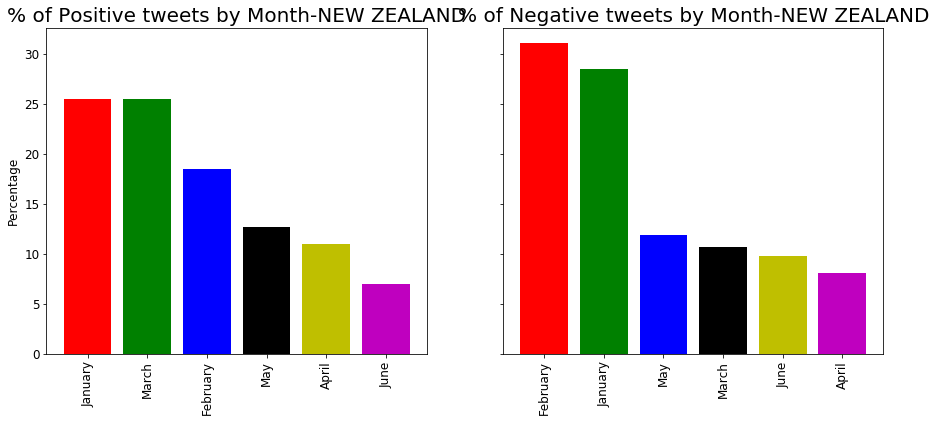

In [48]:
df_pos_nz=df_nz[df_nz.Sentiment=='positive']
data = df_pos_nz["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive tweets by Month-NEW ZEALAND')

df_neg_nz=df_nz[df_nz.Sentiment=='negative']
data = df_neg_nz["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative tweets by Month-NEW ZEALAND')

plt.show()

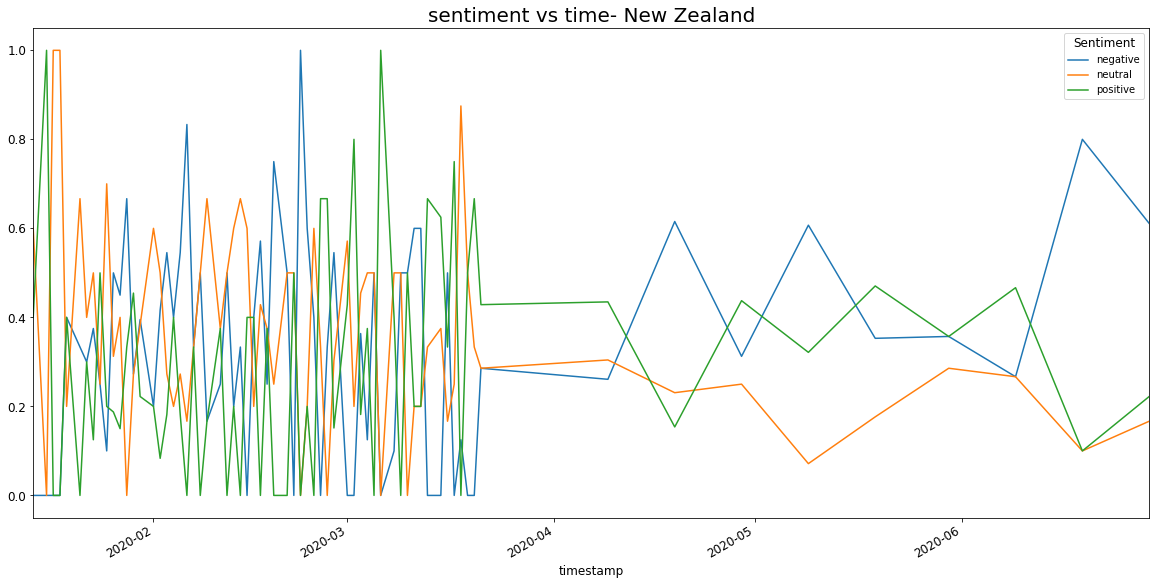

In [49]:
by_day_sentiment = df_nz.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['positive']+by_day_sentiment['negative']+by_day_sentiment['neutral']
by_day_sentiment['positive']=by_day_sentiment['positive']/by_day_sentiment['total']
by_day_sentiment['negative']=by_day_sentiment['negative']/by_day_sentiment['total']
by_day_sentiment['neutral']=by_day_sentiment['neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='sentiment vs time- New Zealand',figsize=(20, 10))

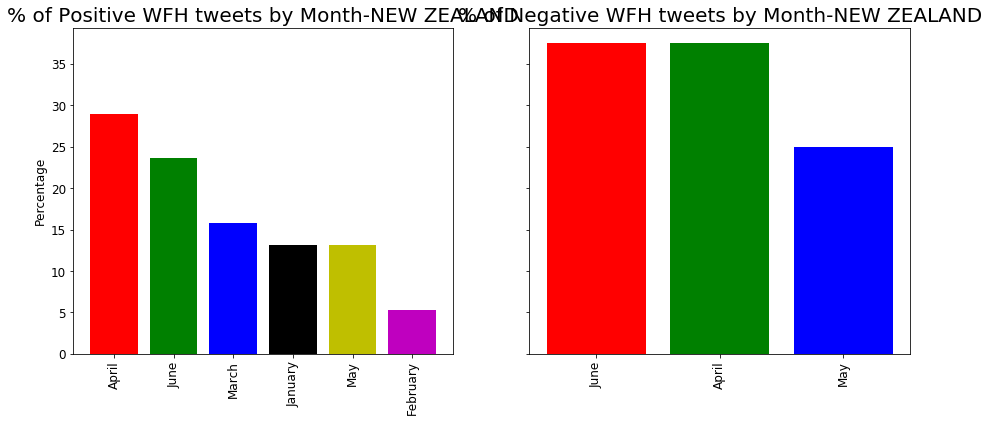

In [50]:
df_pos_nz_wfh=df_nz_wfh[df_nz_wfh.Sentiment=='Positive']
data = df_pos_nz_wfh["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive WFH tweets by Month-NEW ZEALAND')

df_neg_nz_wfh=df_nz_wfh[df_nz_wfh.Sentiment=='Negative']
data = df_neg_nz_wfh["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative WFH tweets by Month-NEW ZEALAND')

plt.show()

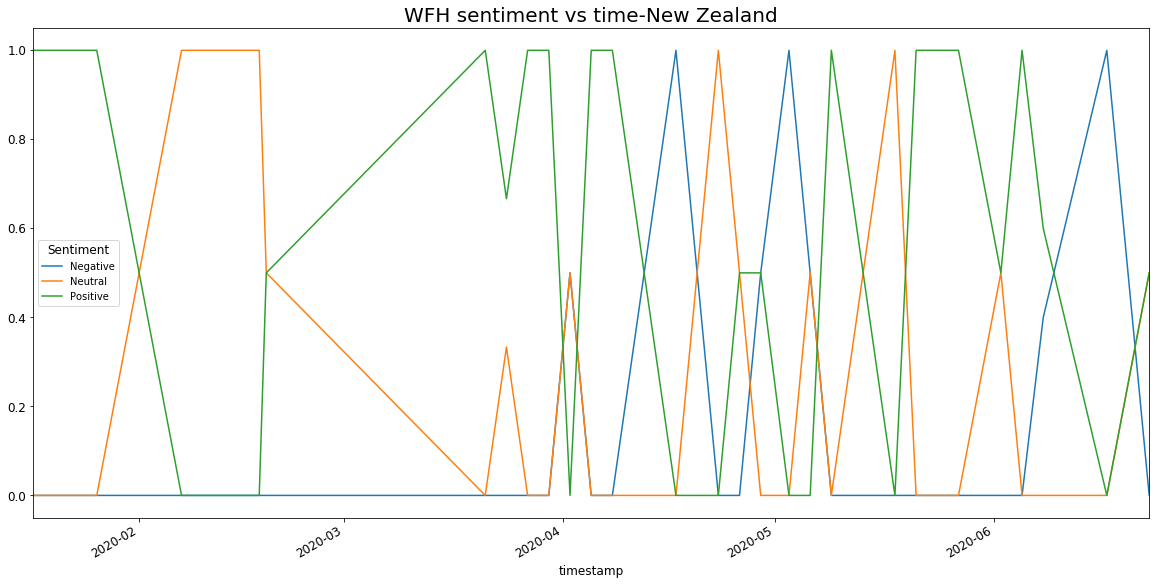

In [51]:
by_day_sentiment = df_nz_wfh.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Negative']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Negative']=by_day_sentiment['Negative']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='WFH sentiment vs time-New Zealand',figsize=(20, 10))

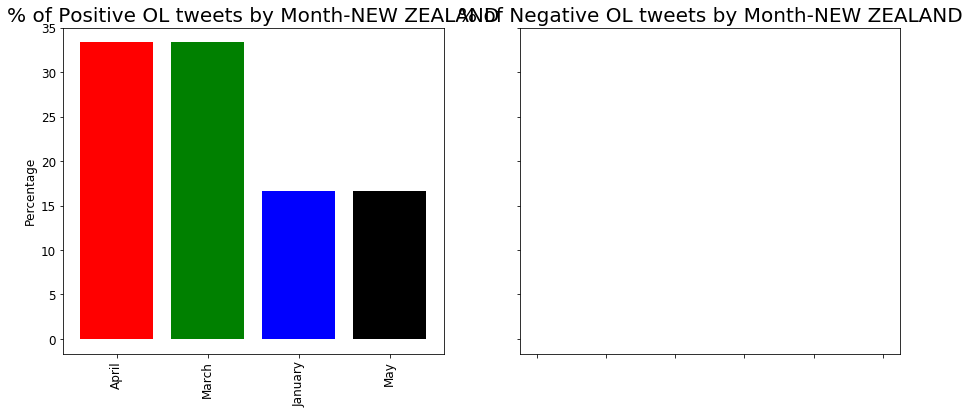

In [52]:
df_pos_nz_ol=df_nz_ol[df_nz_ol.Sentiment=='Positive']
data = df_pos_nz_ol["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive OL tweets by Month-NEW ZEALAND')

df_neg_nz_ol=df_nz_ol[df_nz_ol.Sentiment=='Negative']
data = df_neg_nz_ol["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative OL tweets by Month-NEW ZEALAND')

plt.show()

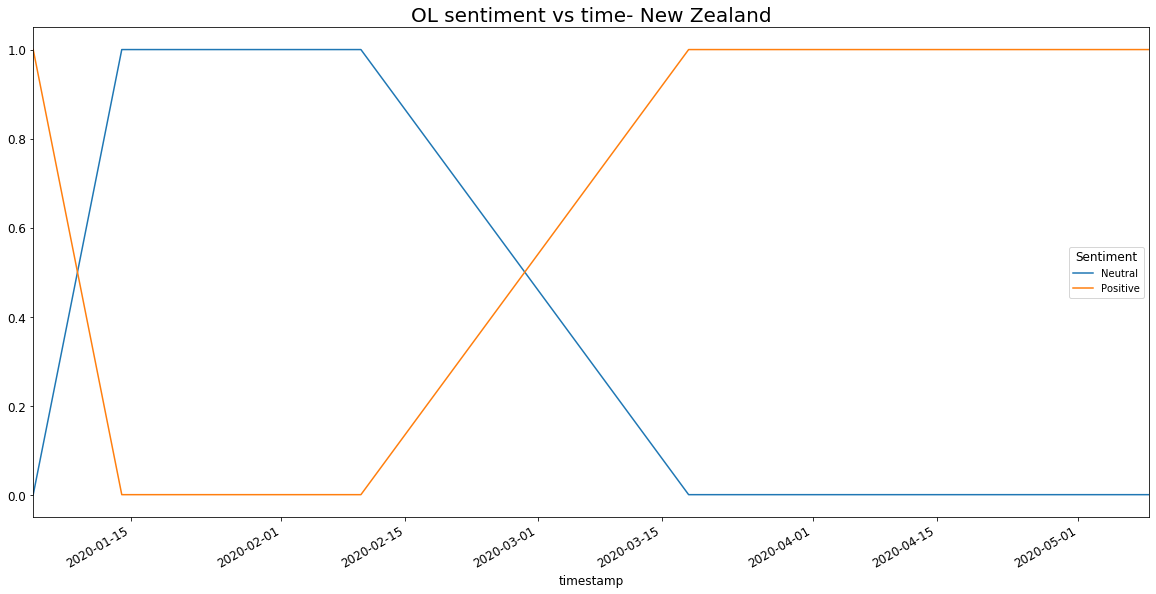

In [53]:
by_day_sentiment = df_nz_ol.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['Positive']+by_day_sentiment['Neutral']
by_day_sentiment['Positive']=by_day_sentiment['Positive']/by_day_sentiment['total']
by_day_sentiment['Neutral']=by_day_sentiment['Neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='OL sentiment vs time- New Zealand',figsize=(20, 10))

In [54]:
#LEAST HIT COUNTRIES-vietnam
df_vietnam=df[df.country=='vietnam']
df_vietnam_wfh=df_wfh[df_wfh.country=='vietnam']
df_vietnam_ol=df_ol[df_ol.country=='vietnam']

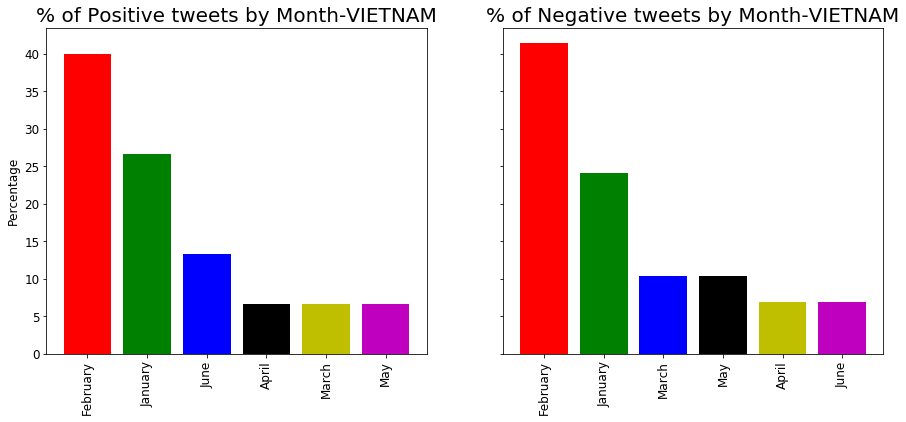

In [55]:
df_pos_vietnam=df_vietnam[df_vietnam.Sentiment=='positive']
data = df_pos_vietnam["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive tweets by Month-VIETNAM')

df_neg_vietnam=df_vietnam[df_vietnam.Sentiment=='negative']
data = df_neg_vietnam["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative tweets by Month-VIETNAM')

plt.show()

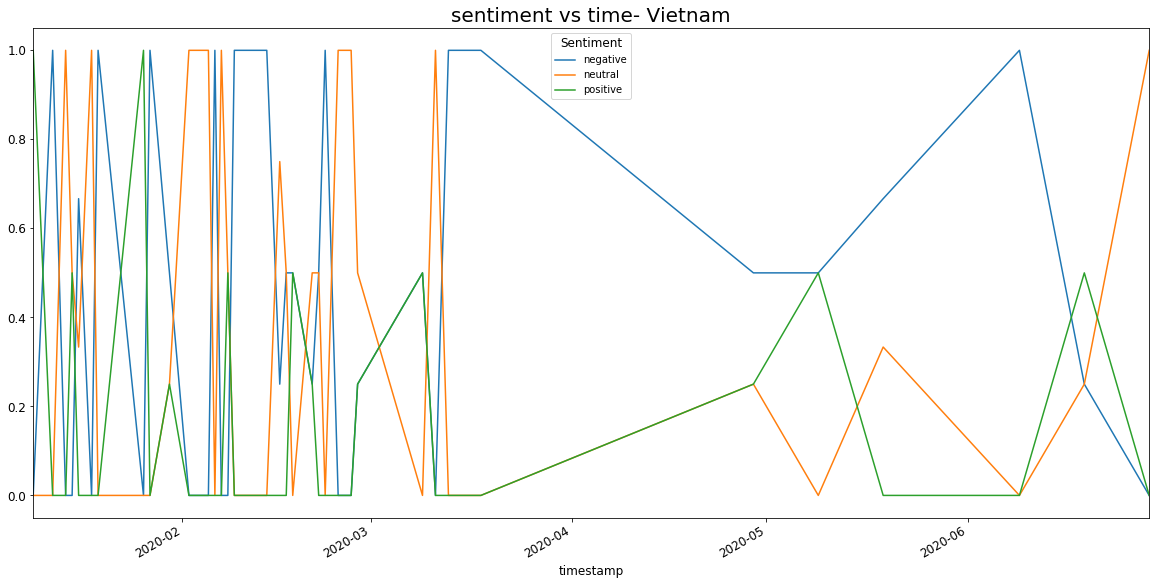

In [56]:
by_day_sentiment = df_vietnam.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['positive']+by_day_sentiment['negative']+by_day_sentiment['neutral']
by_day_sentiment['positive']=by_day_sentiment['positive']/by_day_sentiment['total']
by_day_sentiment['negative']=by_day_sentiment['negative']/by_day_sentiment['total']
by_day_sentiment['neutral']=by_day_sentiment['neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='sentiment vs time- Vietnam',figsize=(20, 10))

In [57]:
#LEAST HIT COUNTRIES-South Korea
df_sk=df[df.country=='south korea']
df_sk_wfh=df_wfh[df_wfh.country=='south korea']
df_sk_ol=df_ol[df_ol.country=='south korea']

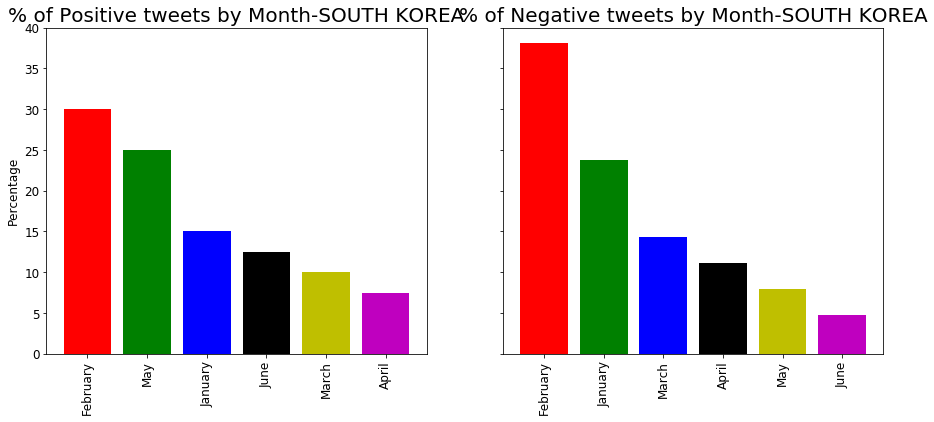

In [58]:
df_pos_sk=df_sk[df_sk.Sentiment=='positive']
data = df_pos_sk["monthName"].value_counts(normalize=True)
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Positive tweets by Month-SOUTH KOREA')

df_neg_sk=df_sk[df_sk.Sentiment=='negative']
data = df_neg_sk["monthName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes2.set_title('% of Negative tweets by Month-SOUTH KOREA')

plt.show()

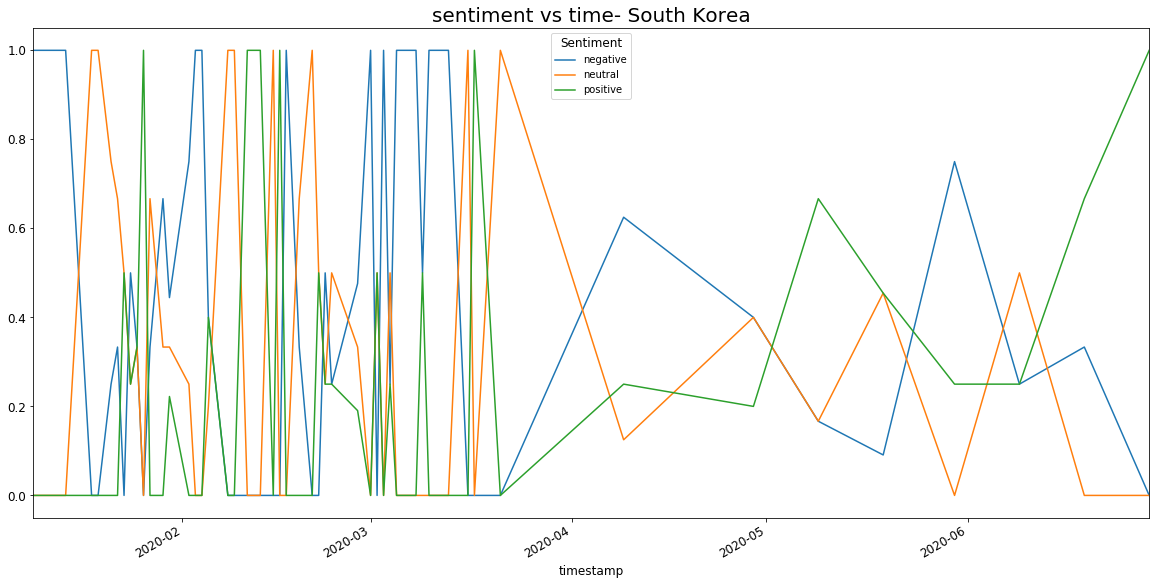

In [59]:
by_day_sentiment = df_sk.groupby([pd.Grouper(key='timestamp', freq='D'), 'Sentiment']) \
    .size().unstack('Sentiment')
by_day_sentiment=by_day_sentiment.fillna(0)
by_day_sentiment['total']=by_day_sentiment['positive']+by_day_sentiment['negative']+by_day_sentiment['neutral']
by_day_sentiment['positive']=by_day_sentiment['positive']/by_day_sentiment['total']
by_day_sentiment['negative']=by_day_sentiment['negative']/by_day_sentiment['total']
by_day_sentiment['neutral']=by_day_sentiment['neutral']/by_day_sentiment['total']
by_day_sentiment=by_day_sentiment.drop(['total'], axis=1)
by_day_sentiment.plot(title='sentiment vs time- South Korea',figsize=(20, 10))

In [60]:
df_wfh_c=pd.read_csv('../Datasets/WFH_final_countrywise.csv')
df_ol_c=pd.read_csv('../Datasets/OL_final_countrywise.csv')
df_c=pd.read_csv('../Datasets/final_countrywise.csv')

In [61]:
#countries with the more positive setiments
pos=df_c[df_c.negative_n<df_c['positive_n']]
pos[pos.neutral_n<pos['positive_n']]

,Unnamed: 0,country,0,negative,positive,neutral,negative_n,positive_n,neutral_n
3,3,american samoa,16,5.0,6.0,5.0,0.312500,0.375000,0.312500
6,6,anguilla,4,0.0,3.0,1.0,0.000000,0.750000,0.250000
14,14,bahamas,41,14.0,15.0,12.0,0.341463,0.365854,0.292683
16,16,bangladesh,192,21.0,117.0,54.0,0.109375,0.609375,0.281250
24,24,bolivia,72,21.0,28.0,23.0,0.291667,0.388889,0.319444
28,28,british virgin islands,3,1.0,2.0,0.0,0.333333,0.666667,0.000000
31,31,burkina faso,114,39.0,40.0,35.0,0.342105,0.350877,0.307018
32,32,burundi,18,5.0,8.0,5.0,0.277778,0.444444,0.277778
49,49,curacao,3,0.0,3.0,0.0,0.000000,1.000000,0.000000
60,60,el salvador,15,4.0,6.0,5.0,0.266667,0.400000,0.333333


In [62]:
#countries with the more negative setiments
neg=df_c[df_c.negative_n>df_c['positive_n']]
neg[neg.neutral_n<neg['negative_n']]

,Unnamed: 0,country,0,negative,positive,neutral,negative_n,positive_n,neutral_n
0,0,afghanistan,26,12.0,7.0,7.0,0.461538,0.269231,0.269231
4,4,andorra,410,172.0,132.0,106.0,0.419512,0.321951,0.258537
7,7,antigua and barbuda,4,2.0,1.0,1.0,0.500000,0.250000,0.250000
9,9,armenia,69,26.0,21.0,22.0,0.376812,0.304348,0.318841
10,10,aruba,5,3.0,0.0,2.0,0.600000,0.000000,0.400000
11,11,australia,7245,2882.0,2109.0,2254.0,0.397792,0.291097,0.311111
12,12,austria,217,86.0,61.0,70.0,0.396313,0.281106,0.322581
13,13,azerbaijan,508,193.0,138.0,177.0,0.379921,0.271654,0.348425
18,18,belarus,101,43.0,41.0,17.0,0.425743,0.405941,0.168317
20,20,belize,16,6.0,5.0,5.0,0.375000,0.312500,0.312500


In [63]:
#countries with the more positive WFH setiments
pos=df_wfh_c[df_wfh_c.negative_n<df_wfh_c['positive_n']]
pos[pos.neutral_n<pos['positive_n']]

,Unnamed: 0,country,0,negative,positive,neutral,negative_n,positive_n,neutral_n
0,0,albania,4,0.0,4.0,0.0,0.000000,1.000000,0.000000
1,1,algeria,1,0.0,1.0,0.0,0.000000,1.000000,0.000000
2,2,american samoa,1,0.0,1.0,0.0,0.000000,1.000000,0.000000
3,3,andorra,49,12.0,32.0,5.0,0.244898,0.653061,0.102041
4,4,angola,3,0.0,3.0,0.0,0.000000,1.000000,0.000000
7,7,argentina,69,10.0,39.0,20.0,0.144928,0.565217,0.289855
8,8,armenia,3,0.0,3.0,0.0,0.000000,1.000000,0.000000
9,9,australia,984,153.0,588.0,243.0,0.155488,0.597561,0.246951
10,10,austria,43,7.0,19.0,17.0,0.162791,0.441860,0.395349
14,14,bangladesh,42,0.0,40.0,2.0,0.000000,0.952381,0.047619


In [64]:
#countries with the most negative WFH setiments
neg=df_wfh_c[df_wfh_c.negative_n>df_wfh_c['positive_n']]
neg[neg.neutral_n<neg['negative_n']]

,Unnamed: 0,country,0,negative,positive,neutral,negative_n,positive_n,neutral_n
16,16,belarus,17,8.0,6.0,3.0,0.470588,0.352941,0.176471
18,18,benin,1,1.0,0.0,0.0,1.000000,0.000000,0.000000
57,57,gibraltar,1,1.0,0.0,0.0,1.000000,0.000000,0.000000
59,59,greenland,1,1.0,0.0,0.0,1.000000,0.000000,0.000000
121,121,saint helena,1,1.0,0.0,0.0,1.000000,0.000000,0.000000
151,151,uruguay,1,1.0,0.0,0.0,1.000000,0.000000,0.000000
155,155,vietnam,1,1.0,0.0,0.0,1.000000,0.000000,0.000000


In [65]:
#countries with the more positive OL setiments
pos=df_ol_c[df_ol_c.negative_n<df_ol_c['positive_n']]
pos[pos.neutral_n<pos['positive_n']]

,Unnamed: 0,country,0,negative,positive,neutral,negative_n,positive_n,neutral_n
1,1,albania,9,2.0,4.0,3.0,0.222222,0.444444,0.333333
4,4,andorra,41,7.0,20.0,14.0,0.170732,0.487805,0.341463
7,7,argentina,79,18.0,36.0,25.0,0.227848,0.455696,0.316456
9,9,australia,234,50.0,130.0,54.0,0.213675,0.555556,0.230769
10,10,austria,33,13.0,14.0,6.0,0.393939,0.424242,0.181818
11,11,azerbaijan,17,2.0,14.0,1.0,0.117647,0.823529,0.058824
13,13,bahrain,4,1.0,3.0,0.0,0.250000,0.750000,0.000000
15,15,barbados,9,1.0,5.0,3.0,0.111111,0.555556,0.333333
16,16,belarus,14,6.0,7.0,1.0,0.428571,0.500000,0.071429
17,17,belgium,30,6.0,17.0,7.0,0.200000,0.566667,0.233333


In [66]:
#countries with the most negative OL setiments
neg=df_ol_c[df_ol_c.negative_n>df_ol_c['positive_n']]
neg[neg.neutral_n<neg['negative_n']]

,Unnamed: 0,country,0,negative,positive,neutral,negative_n,positive_n,neutral_n
5,5,angola,3,2.0,0.0,1.0,0.666667,0.000000,0.333333
19,19,benin,2,2.0,0.0,0.0,1.000000,0.000000,0.000000
28,28,burundi,12,5.0,4.0,3.0,0.416667,0.333333,0.250000
35,35,chile,8,4.0,2.0,2.0,0.500000,0.250000,0.250000
46,46,dominican republic,6,3.0,1.0,2.0,0.500000,0.166667,0.333333
53,53,faroe islands,1,1.0,0.0,0.0,1.000000,0.000000,0.000000
64,64,grenada,1,1.0,0.0,0.0,1.000000,0.000000,0.000000
67,67,guernsey,1,1.0,0.0,0.0,1.000000,0.000000,0.000000
70,70,haiti,3,2.0,1.0,0.0,0.666667,0.333333,0.000000
71,71,honduras,3,2.0,0.0,1.0,0.666667,0.000000,0.333333
